1. The null hypothesis for Table 3.4 is that spending more on advertising has zero effect on sales.  Based on the table's p-values, Intercept, TV, and Radio were significant, newspaper insignificant.  Intercept means that spending advertising at all leads to increasing sales, TV and radio mean spending on those types produce more sales, and newspaper being insignificant means there's no meaningful correlation between spending on newspaper ads and converting to sales.  Therefore we can reject the null hypothesis for everything besides newspaper since their p-values are very low.

2. Differences between KNN classifier and KNN regression methods:
- KNN Classifier classifies between qualitative categories-- like hotdog or not hotdog.
- KNN regression is used to predict a continuous variable.
- KNN classifier takes discrete categories as inputs whereas regression takes a continuous variable as input, or observations of a continuous variable.  The classifier outputs a majority vote based on neighbors, whereas the regression methods output an average of the neighbors' values.  KNN classifier takes in a data point and outputs one of a set of possible categories, KNN regression takes in a data point and outputs a prediction for a continuous variable, like a linear regression step function.

3a. ii. is correct-- for a fixed GPA and IQ, college grads earn more on average than high school.  We draw this conclusion from beta3.  Since beta3 is 35, and x3 it is 1 for college, 0 for high school, it means college grads earn more than high school grads.

3b. for IQ = 110 and GPA = 4.0 and level = college:

salary = beta0 + GPA * beta1 + IQ * beta2 + level * beta3 + IQ * GPA * beta4 + GPA * level * beta5

salary = 50 + 4*20 + 110*.07 + 1*35 + 4*110*.01 - 4*1*10 = 176.7

3c. having a small interaction term between IQ and GPA does not justify removing it.  Interaction terms should be small especially if the underlying magnitudes are large.  Multiplying IQ by GPA usually results in a pretty large number, even when multiplied by the coefficient of .01, for example 4*110*.01 is still 44.  The coefficients all correspond to the magnitudes of the underlying variables, and since IQ is generally a large number, when multiplied by GPA, the synergistic effect is still present despite the low coefficient.  That could also be telling us that IQ and GPA only interact significantly if they're both high, even more of a reason not to remove it.

4a. The cubic regression RSS will be equal to or lower than the linear regression.

4b. Given that the actual relationship is linear, the linear model will outperform the cubic model on out of sample data.

4c. This should mean the cubic model's RSS for training data will be lower than linear because the relationship isn't linear.

4d. For out of sample data, there isn't enough information to tell.  For this and 4b, it is somewhat likely the cubic regression will exhibit overfitting, though more likely for 4b versus 4d, and thus will have a lower training RSS but higher test RSS than the linear model, although we can't be certain because we don't know the nature of the relationship for 4d.

5. a' = sigma(xi*yi) / sigma(x^2) which is the same as beta_hat

6. Linear regression predicts trends using one line.  It makes logical sense to conclude that this line passes through (xbar, ybar), these being the averages of prediction and response.  The average is a point of fit even for skewed data.

In [ ]:
7. if xbar=ybar=0 R^2 = TSS/ESS, plug in beta1_hat and it equals r * r therefore R^2 = r^2

In [ ]:
#8a
import statsmodels.api as sm
import pandas as pd
from ISLP import load_data

auto = load_data("Auto")
X = auto['horsepower']
y = auto['mpg']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        07:57:12   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

8a. i: yes, there is a statistically significant relationship between predictor and response.
ii. It's a somewhat strong iii. negative correlation.
iv. see below

In [15]:
import numpy as np
new_X = pd.DataFrame({'const': 1, 'horsepower': [98]})

pred = model.get_prediction(new_X)
summary_frame = pred.summary_frame(alpha=.05)
print(summary_frame)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


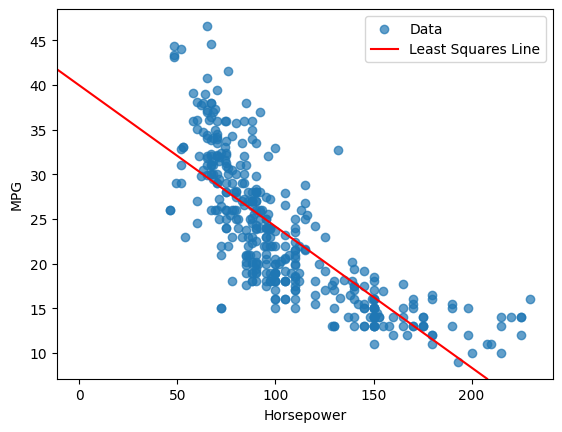

In [18]:
#8b
import matplotlib.pyplot as plt

intercept = model.params['const']
slope = model.params['horsepower']

fig, ax = plt.subplots()
ax.scatter(auto['horsepower'], auto['mpg'], label = 'Data', alpha=.7)
ax.axline((0, intercept), slope=slope, color='red', label='Least Squares Line')

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.legend()
plt.show()

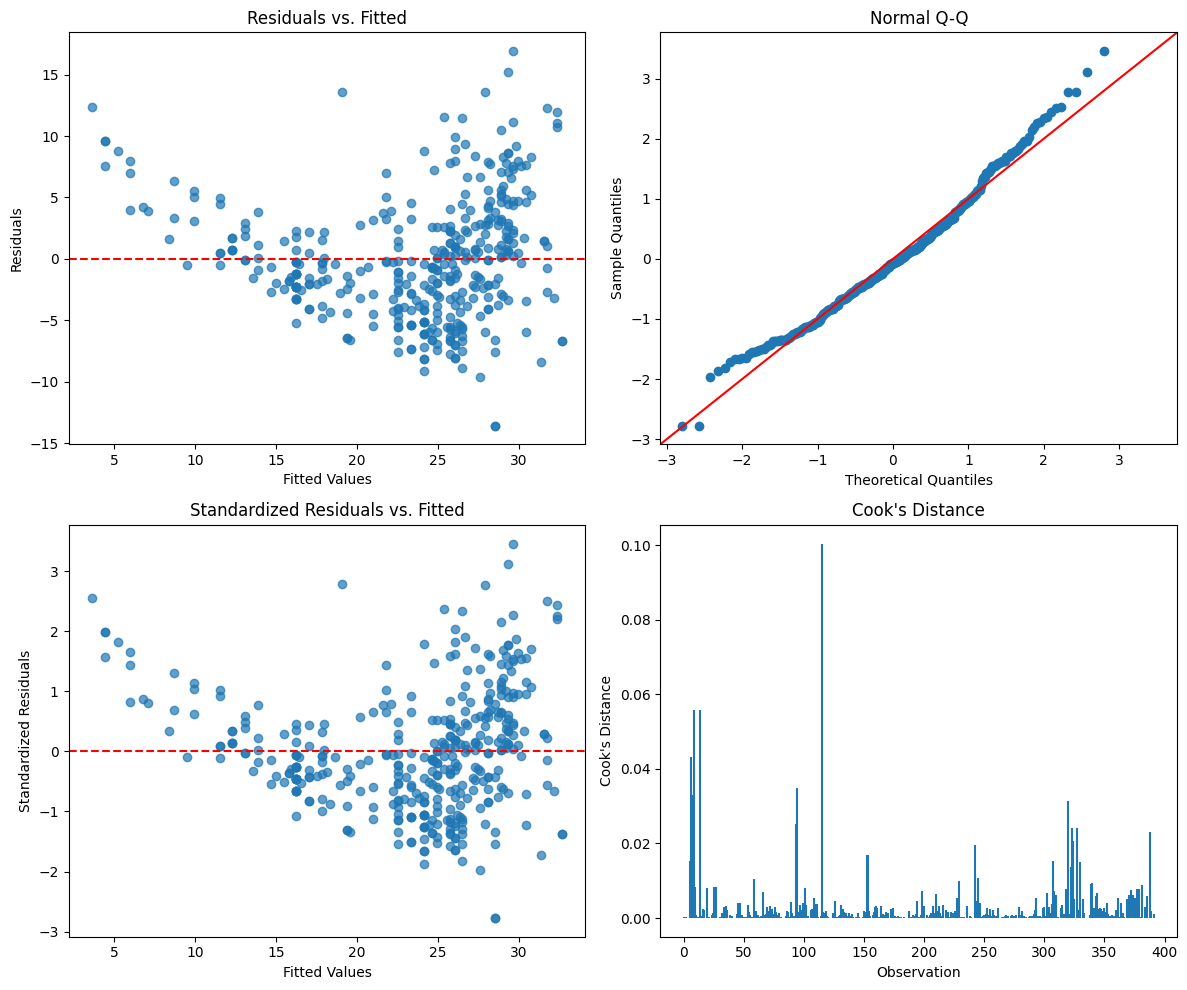

In [25]:
#8c
fitted_vals = model.fittedvalues
residuals = model.resid
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
cooks = influence.cooks_distance[0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#Residuals vs. Fitted
axes[0,0].scatter(fitted_vals, residuals, alpha=.7)
axes[0,0].axhline(0, color='red', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs. Fitted')

#Normal Q-Q
sm.qqplot(residuals, line='45', ax=axes[0, 1], fit=True)
axes[0,1].set_title('Normal Q-Q')

#Standardized Residuals vs. Fitted
axes[1,0].scatter(fitted_vals, standardized_residuals, alpha=.7)
axes[1,0].axhline(0, color='red', linestyle='--')
axes[1,0].set_xlabel('Fitted Values')
axes[1,0].set_ylabel('Standardized Residuals')
axes[1,0].set_title('Standardized Residuals vs. Fitted')

#Cook's Distance
axes[1,1].stem(np.arange(len(cooks)), cooks, markerfmt=" ", basefmt=" ")
axes[1,1].set_xlabel('Observation')
axes[1,1].set_ylabel("Cook's Distance")
axes[1,1].set_title("Cook's Distance")

plt.tight_layout()
plt.show()

Observations:
- Both residual plots show parabolic patterns, hinting that a polynomial term could improve fit, and hint at heteroscedacity.
- QQ tails aren't perfectly normal, so extremes aren't being predicted well.
- There are a few significant leverage points worth nothing, with a massive one around observation 120 (3 observations with Cook's Distance > .5, worth noting).
- based off these observations, polynomial regression might fit the trend better, and transforming horsepower could have a positive impact on model fit.  Also investigate the influence point(s) and rerun to see if fit improves.